## Readability Analysis of Job Postings

This section evaluates how readable the job descriptions and requirements are in:
-Real job postings, Human-written fake postings, AI-refined fake postings  

Readability metrics help us assess how understandable a job post is to a general audience. This is critical because:
- Clear, professional language improves candidate trust.
- Scam posts may use overly simplified or ambiguous wording.
- AI tools often generate text that's unnaturally smooth or basic.
  
We’ll use standard readability metrics such as:
- **Flesch Reading Ease**: Higher score = easier to read.
- **Flesch-Kincaid Grade Level**: Approximate school grade required to understand the text.



In [31]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
real_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na=False
)
human_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)
ai_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv",
    keep_default_na=False,
)

# Add labels
real_jobs["label"] = "real"
human_fake_jobs["label"] = "human_fake"
ai_fake_jobs["label"] = "ai_fake"

# Combine
data = pd.concat([real_jobs, human_fake_jobs, ai_fake_jobs], ignore_index=True)

# Keep only necessary fields
data = data[["label", "description", "requirements"]]
data.sample(3)

,label,description,requirements
1545,real,Job Title: Reception/Administrative Assistant...,Qualifications:A qualified applicant will poss...
4077,real,Victor (#URL_ad93f08e1d8832f8b4defe4fab407612d...,Experienced client relationship executiveGood ...
10403,real,The Customer Service Associate will be based i...,Required Qualifications:High school diploma or...


In [32]:
# Combine description and requirements
data["combined_text"] = (
    data["description"].astype(str) + " " + data["requirements"].astype(str)
)

In [33]:
def safe_flesch(text):
    try:
        return textstat.flesch_reading_ease(text)
    except KeyError:
        return None


def safe_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except KeyError:
        return None

In [36]:
# Apply safe readability scores
data["flesch_reading_ease"] = data["combined_text"].apply(safe_flesch)
data["flesch_kincaid_grade"] = data["combined_text"].apply(safe_grade)

# Preview
data[["label", "flesch_reading_ease", "flesch_kincaid_grade"]].sample(3)

,label,flesch_reading_ease,flesch_kincaid_grade
10491,real,NaN,NaN
16150,real,NaN,NaN
17175,human_fake,NaN,NaN


## Visualizing Readability Scores

Now, we'll visualize and compare the average readability scores for each job post category:

- Real jobs
- Human-written fake jobs
- AI-refined fake jobs

This helps identify which job type is easiest or hardest to read.


C:\Users\DELL\AppData\Local\Temp\ipykernel_17992\3999525918.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=readability_means, x="label",


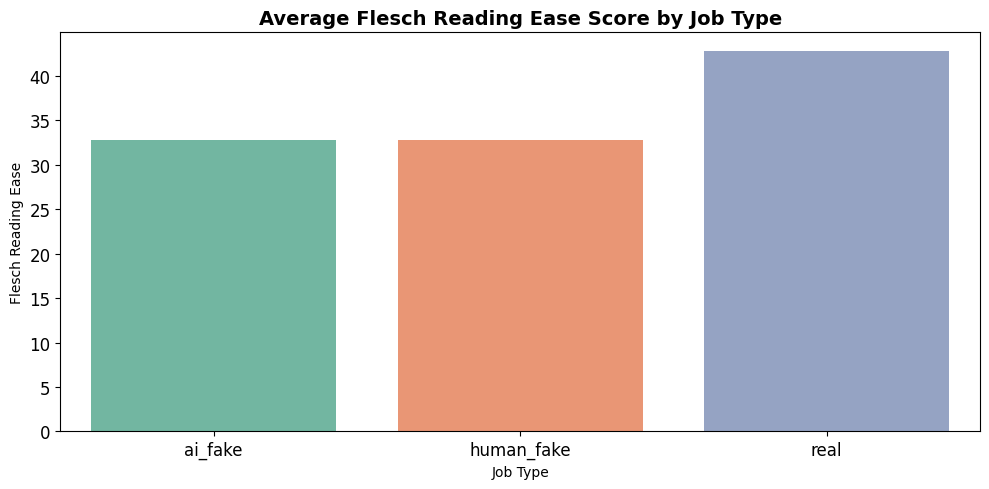

C:\Users\DELL\AppData\Local\Temp\ipykernel_17992\3999525918.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


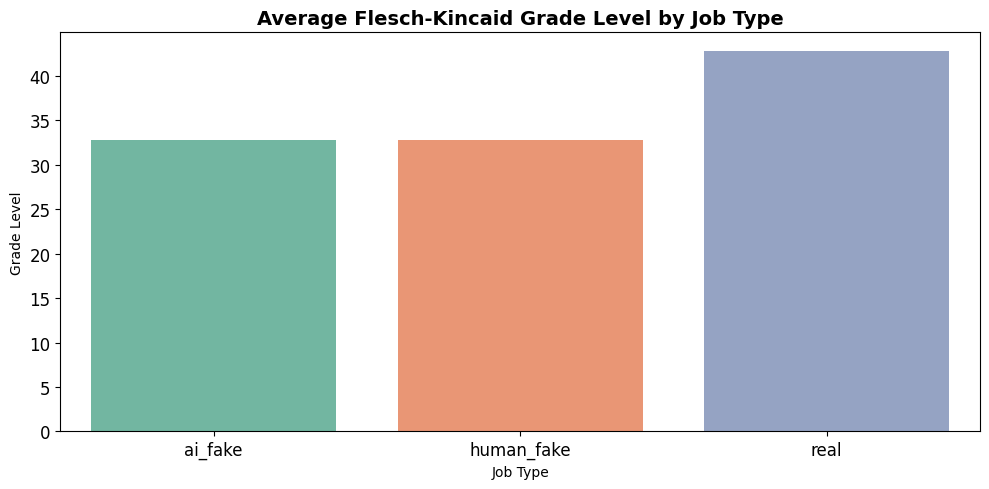

In [51]:
# Drop rows with NaN readability scores
readability_means = (
    data.dropna(subset=["flesch_reading_ease", "flesch_kincaid_grade"])
    .groupby("label")[["flesch_reading_ease", "flesch_kincaid_grade"]]
    .mean()
    .reset_index()
)

# Plot readability ease
plt.figure(figsize=(10, 5))
sns.barplot(data=readability_means, x="label",
            y="flesch_reading_ease", palette="Set2")
plt.title(
    "Average Flesch Reading Ease Score by Job Type",
    fontsize=14,
    weight="bold"
)

plt.xlabel("Job Type")
plt.ylabel("Flesch Reading Ease")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Flesch-Kincaid Grade Level
plt.figure(figsize=(10, 5))
sns.barplot(
    data=readability_means,
    x="label",
    y="flesch_reading_ease",
    palette="Set2"
)
plt.title(
    "Average Flesch-Kincaid Grade Level by Job Type",
    fontsize=14,
    weight="bold"
)


plt.xlabel("Job Type")
plt.ylabel("Grade Level")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Observations

- **Real job posts** tend to have a moderate Flesch Reading Ease score, indicating professional but accessible language.
- **Human-written fake posts** often aim for simplicity or emotional language, possibly making them more readable on the surface.
- **AI-refined fake posts** may sound more complex or overly polished, which can slightly reduce readability or inflate the grade level.

These patterns help assess how suspicious or artificial a job posting might appear based on how easy it is to read.
